## Model Building and saving the model using Pickle

### 1. Import required libraries and read the dataset.

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('loan_approval_data.csv')

In [3]:
data.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [4]:
data.shape

(614, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


### 3. Check for missing values in the dataset, if present? handle them with appropriate methods and drop redundant features.

In [6]:
data.isnull().sum()

loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

In [7]:
data.isnull().sum()*100/len(data)

loan_id              0.000000
gender               2.117264
married              0.488599
dependents           2.442997
education            0.000000
self_employed        5.211726
applicantincome      0.000000
coapplicantincome    0.000000
loanamount           3.583062
loan_amount_term     2.280130
credit_history       8.143322
property_area        0.000000
loan_status          0.000000
dtype: float64

In [8]:
data = data.drop('loan_id',axis=1)

In [9]:
data.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [10]:
data.isnull().sum()*100/len(data)

gender               2.117264
married              0.488599
dependents           2.442997
education            0.000000
self_employed        5.211726
applicantincome      0.000000
coapplicantincome    0.000000
loanamount           3.583062
loan_amount_term     2.280130
credit_history       8.143322
property_area        0.000000
loan_status          0.000000
dtype: float64

In [11]:
columns = ['gender','dependents','loanamount','loan_amount_term']

In [12]:
data = data.dropna(subset=columns)

In [13]:
data.isnull().sum()*100 / len(data)

gender               0.000000
married              0.000000
dependents           0.000000
education            0.000000
self_employed        5.424955
applicantincome      0.000000
coapplicantincome    0.000000
loanamount           0.000000
loan_amount_term     0.000000
credit_history       8.679928
property_area        0.000000
loan_status          0.000000
dtype: float64

In [14]:
data['self_employed'].mode()[0]

'no'

In [15]:
data['self_employed'] =data['self_employed'].fillna(data['self_employed'].mode()[0])

In [16]:
data.isnull().sum()*100 / len(data)

gender               0.000000
married              0.000000
dependents           0.000000
education            0.000000
self_employed        0.000000
applicantincome      0.000000
coapplicantincome    0.000000
loanamount           0.000000
loan_amount_term     0.000000
credit_history       8.679928
property_area        0.000000
loan_status          0.000000
dtype: float64

In [17]:
data['credit_history'].mode()[0]

1.0

In [18]:
data['credit_history'] =data['credit_history'].fillna(data['credit_history'].mode()[0])

In [19]:
data.isnull().sum()*100 / len(data)

gender               0.0
married              0.0
dependents           0.0
education            0.0
self_employed        0.0
applicantincome      0.0
coapplicantincome    0.0
loanamount           0.0
loan_amount_term     0.0
credit_history       0.0
property_area        0.0
loan_status          0.0
dtype: float64

### 4. Visualize the distribution of the target column 'loan_status' with respect to various categorical features and write your observations.

In [20]:
import seaborn as sns

<AxesSubplot:xlabel='education', ylabel='count'>

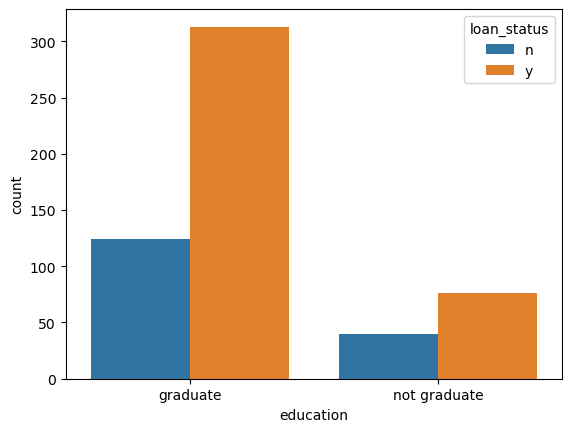

In [21]:
sns.countplot(x='education', hue='loan_status', data=data)

<AxesSubplot:xlabel='married', ylabel='count'>

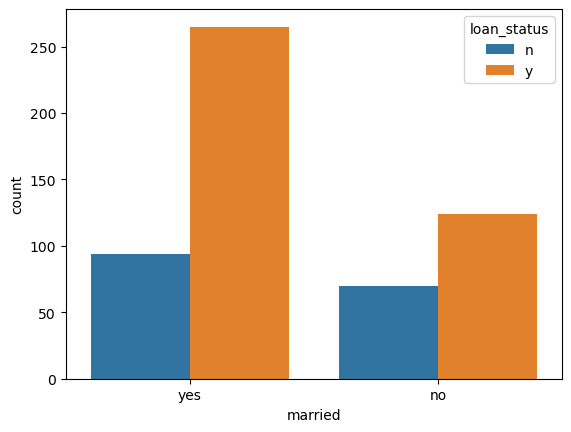

In [22]:
sns.countplot(x='married', hue='loan_status', data=data)

<AxesSubplot:xlabel='self_employed', ylabel='count'>

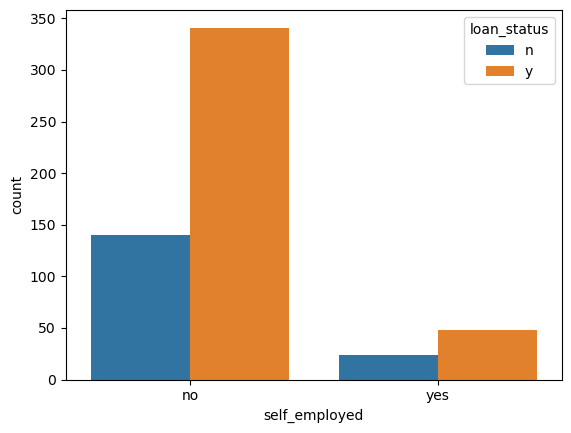

In [23]:
sns.countplot(x='self_employed', hue='loan_status', data=data)

<AxesSubplot:xlabel='gender', ylabel='count'>

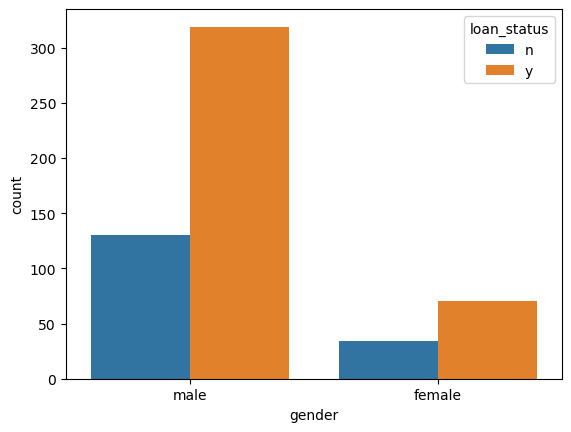

In [24]:
sns.countplot(x='gender', hue='loan_status', data=data)

<AxesSubplot:xlabel='property_area', ylabel='count'>

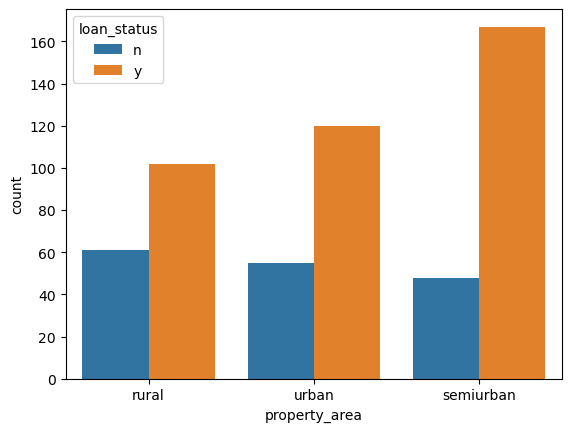

In [25]:
sns.countplot(x='property_area', hue='loan_status', data=data)

### 5. Encode the categorical data.

In [26]:
data.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
1,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y
5,male,yes,2.0,graduate,yes,5417,4196.0,267.0,360.0,1.0,urban,y


In [27]:
data['gender'] = data['gender'].map({'male':1,'female':0}).astype('int')
data['married'] = data['married'].map({'yes':1,'no':0}).astype('int')
data['education'] = data['education'].map({'graduate':1,'not graduate':0}).astype('int')
data['self_employed'] = data['self_employed'].map({'yes':1,'no':0}).astype('int')
data['property_area'] = data['property_area'].map({'rural':0,'semiurban':2,'urban':1}).astype('int')
data['loan_status'] = data['loan_status'].map({'y':1,'n':0}).astype('int')

In [28]:
data.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
1,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2.0,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [29]:
X = data.drop('loan_status',axis=1)
y = data['loan_status']

In [30]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: loan_status, Length: 553, dtype: int32

In [31]:
cols = ['applicantincome','coapplicantincome','loanamount','loan_amount_term']

In [32]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X[cols]=st.fit_transform(X[cols])

In [33]:
X

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area
1,1,1,1.0,1,0,-0.128694,-0.049699,-0.214368,0.279961,1.0,0
2,1,1,0.0,1,1,-0.394296,-0.545638,-0.952675,0.279961,1.0,1
3,1,1,0.0,0,0,-0.464262,0.229842,-0.309634,0.279961,1.0,1
4,1,0,0.0,1,0,0.109057,-0.545638,-0.059562,0.279961,1.0,1
5,1,1,2.0,1,1,0.011239,0.834309,1.440866,0.279961,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.0,1,0,-0.411075,-0.545638,-0.893134,0.279961,1.0,0
610,1,1,3.0,1,0,-0.208727,-0.545638,-1.262287,-2.468292,1.0,0
611,1,1,1.0,1,0,0.456706,-0.466709,1.274152,0.279961,1.0,1
612,1,1,2.0,1,0,0.374659,-0.545638,0.488213,0.279961,1.0,1


### 6. Separate the target and independent features and split the data into train and test.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

In [35]:
model_df={}
def model_val(model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,
                                                   test_size=0.20,
                                                   random_state=42)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f"{model} accuracy is {accuracy_score(y_test,y_pred)}")
    
    score = cross_val_score(model,X,y,cv=5)
    print(f"{model} Avg cross val score is {np.mean(score)}")
    model_df[model]=round(np.mean(score)*100,2)

In [36]:
model_df

{}

### 7. Build any classification model to predict the loan status of the customer and save your model using pickle.

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model_val(model,X,y)

LogisticRegression() accuracy is 0.8018018018018018
LogisticRegression() Avg cross val score is 0.8047829647829647


In [38]:
import pickle
#saving model to disk
pickle.dump(model,open('model.pkl','wb'))